<a href="https://colab.research.google.com/github/Yaswanth1127/VITJAVASCRIPT/blob/main/Detection_YoloV8_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading Dependencies

---



In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 26.9 MB/s eta 0:00:00


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


## Fetching dataset from Roboflow API

---



**Original Dataset**

In [4]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("object-detect-dmjpt").project("ocean_waste")
dataset = project.version(1).download("yolov8")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ocean_waste-1 in yolov8:: 100%|██████████| 10284/10284 [00:01<00:00, 5387.46it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Denoised Dataset**

In [5]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("neural-ocean").project("neural_ocean")
dataset = project.version(3).download("yolov8")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:01<00:00, 7497.17it/s]


## Training

---



In [6]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=60 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 268MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Neural_Ocean-3/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

## Testing

---



In [9]:
!yolo task=detect \
mode=predict \
model=/content/yolov8s.pt\
conf=0.25 \
source={dataset.location}/test/images

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/501 /content/Neural_Ocean-3/test/images/1bc7-iudfmpmn7245599_jpg.rf.0c27f6617b1c2d7665a4badbb8474e28.jpg: 640x640 (no detections), 16.5ms
image 2/501 /content/Neural_Ocean-3/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.2cb8ff79c143c7677ba333349c528e23.jpg: 640x640 (no detections), 16.5ms
image 3/501 /content/Neural_Ocean-3/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 640x640 (no detections), 16.4ms
image 4/501 /content/Neural_Ocean-3/test/images/7_JPG_jpg.rf.c73c6cc42828be1d9a13a8a520607ca8.jpg: 640x640 (no detections), 16.4ms
image 5/501 /content/Neural_Ocean-3/test/images/GettyImages-1227891345-1000x667_jpg.rf.463d0f90b57eac0801f0a335a754dd23.jpg: 640x640 (no detections), 16.5ms
image 6/501 /content/Neural_Ocean-3/test/images/GettyImag

## Run inference on random images

---



In [22]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model



## Visualize on Google Colab

---



In [23]:
from google.colab.patches import cv2_imshow


image 1/1 /content/ocean_waste-1/train/images/1612771376588_293_640x386_png_jpg.rf.2196994602165296f7b2ae2f00cfa1b0.jpg: 640x640 1 kite, 8.7ms
Speed: 4.5ms preprocess, 8.7ms inference, 569.5ms postprocess per image at shape (1, 3, 640, 640)


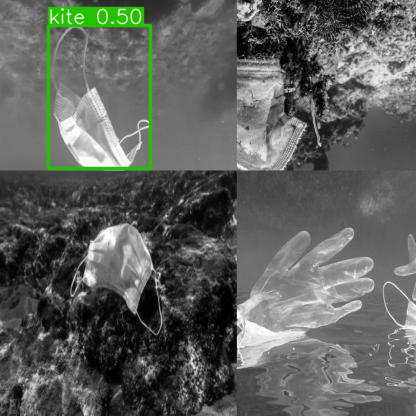

In [28]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/yolo11n.pt')
results = model('/content/ocean_waste-1/train/images/1612771376588_293_640x386_png_jpg.rf.2196994602165296f7b2ae2f00cfa1b0.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)